<a href="https://colab.research.google.com/github/GuilhermeCarv/Fraude-Cartao-de-Credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Guilherme Carvalho](https://www.linkedin.com/in/guilherme-carvalho08)*  

---

# Detecção de Fraudes em Cartões de Crédito

As fraudes bancárias são um dos golpes mais aplicados em todo o mundo. Segundo levantamento do [Mapa da Fraude da Clear Sale](https://br.clear.sale/mapa-da-fraude), apenas em 2021, 2% de todas as transações bancárias brasileiras foram tentativas de fraude, isso totalizaria um montante de R$5,8 bilhões caso esses golpes fossem bem sucedidos.

Analisando-se valores gigantescos como este e vislumbrando a tendência de cada vez mais tentativas de fraudes acontecerem fruto da popularização de compras online, facilidade na aquisição de cartões de crédito, entre outros aspectos, as empresas tem investido cada vez mais em estratégias e tecnologias que auxiliem no combate as fraudes.

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1171&q=80" width="60%"></p>

Dentra essas tecnologias, a utilização de Inteligência Artificial para detecção envolvendo fraudes com transações de cartões de crédito vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

A grande quantidade de dados, tanto passados como presentes, fornece uma base robusta para algoritmos de machine learning e, a melhora, mesmo que apenas marginal, de performance deste pode representar uma economia significativa para a empresa.

Motivado por esse cenário existente e dispondo de uma base de dados fornecida no [Kaggle](https://www.kaggle.com/) acerca de transações de cartões de crédito europeus, este projeto visa aplicar modelos de machine learning para a classificação de transações como fraudes e não-fraudes. 

## Importando os Dados

Conforme explicitado anteriormente, os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito no Kaggle. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Pela natureza sensível dos dados e questões de privacidade todas as *features*, com excessão do tempo decorrido desde a primeira transação (`Time`) e a quantia transacionada (`Amount`) passaram por um processo de descaracterização e foram nomeadas genericamente como $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1537724326059-2ea20251b9c8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1176&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), outras informações são passadas, como o fato de as varíaveis do *DataSet* terem passado por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários

#pacote para trazer o timestamp de cada execução de célula
!pip install ipython-autotime
%load_ext autotime

!pip install pandas
!pip install plotly
!pip install seaborn
!pip install imblearn

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

!pip install scikit-plot
import scikitplot as skplt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import RocCurveDisplay


Para facilitar a aquisição dos dados e garantir que a base de dados seja sempre a mesma utilizada no projeto o *DataSet* foi salvo num *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

time: 8.14 s (started: 2022-04-25 19:13:46 +00:00)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

O primeiro passo é garantir que um conjunto de testes seja criado, de forma a proteger esses dados de qualquer contato com o conjunto que será utilizado durante todo o processo de Machine Learning no projeto.

Existem várias proporções que podem ser utilizadas para divisão entre treino e teste, para este projeto definiu-se uma proporção de 85% em treino e 15% de testes.

Feito isso, vamos à Análise Exploratória.

In [ ]:
df_teste = df.sample(frac=0.15, random_state=0)
df = df.drop(df_teste.index)

time: 228 ms (started: 2022-04-25 19:13:55 +00:00)


## Análise Exploratória

Uma boa Análise Exploratória propicia informações acerca do comportamento do *DataSet* e quanto a necessidade de manipulação de valores ausentes, tipos de dados, entre outras informações.

In [ ]:
print("O DataSet possui %2d linhas e %2d colunas"% (df.shape[0], df.shape[1]))

O DataSet possui 242086 linhas e 31 colunas
time: 9.56 ms (started: 2022-04-25 19:14:01 +00:00)


In [ ]:
#Visualizando as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


time: 75.6 ms (started: 2022-04-25 19:14:01 +00:00)


In [ ]:
#Visualizando as medidas estatísticas
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


time: 901 ms (started: 2022-04-25 19:14:04 +00:00)


In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

time: 46.5 ms (started: 2022-04-25 19:14:05 +00:00)


Os dados de count e de valores nulos no DataSet demonstram que a base já veio tratada e está completa, uma vez que todas as features encontram-se sem valores ausentes.

Outro indicativo interessante que o describe traz é em relação a feature `Amount`:

* A média dos valores transacionados é de 88.61
* A mediana da feature é 22, ou seja, 50% dos valores transacionados estão abaixo dessa quantia 

Isso leva a crer que a utilização do cartão de crédito usualmente ocorre para pequenas quantias

Outra averiguação acerca do DataSet que é a verificação quanto ao balanceamento da variável alvo a ser estudada. Pelo cerne dos dados e do negócio a ser estudado é plausível imaginar que os dados são desbalanceados, uma vez que o objetivo de companhias de cartão de crédito é reduzir ao máximo as fraudes, já que estas, além de afetarem financeiramente a companhia e o usuário, tendem a manchar a reputação da empresa.  

Pela natureza da variável alvo a ser estudada (`Class`) é possível se verificar esse balanceamento por meio de um histograma como o a seguir:

Apenas 0.173% do dataset são fraudes


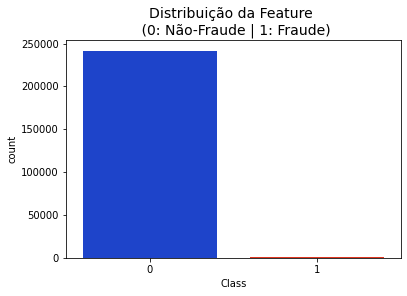

time: 401 ms (started: 2022-04-25 19:14:08 +00:00)


In [ ]:
colors = ['#0234E6','#FF1E00']
sns.countplot(x='Class',data = df,palette = colors);
plt.title('Distribuição da Feature \n (0: Não-Fraude | 1: Fraude)', fontsize=14);
print("Apenas {:.3f}% do dataset são fraudes".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

Conforme esperado, o DataSet claramente apresenta um desbalanceamento nos dados, uma vez que quase todas as transações são do tipo Não-Fraude.

Outro histograma, com a distribuição das transações ao longo do tempo, pode ser plotado para se verificar se existe alguma anomalia evidente.


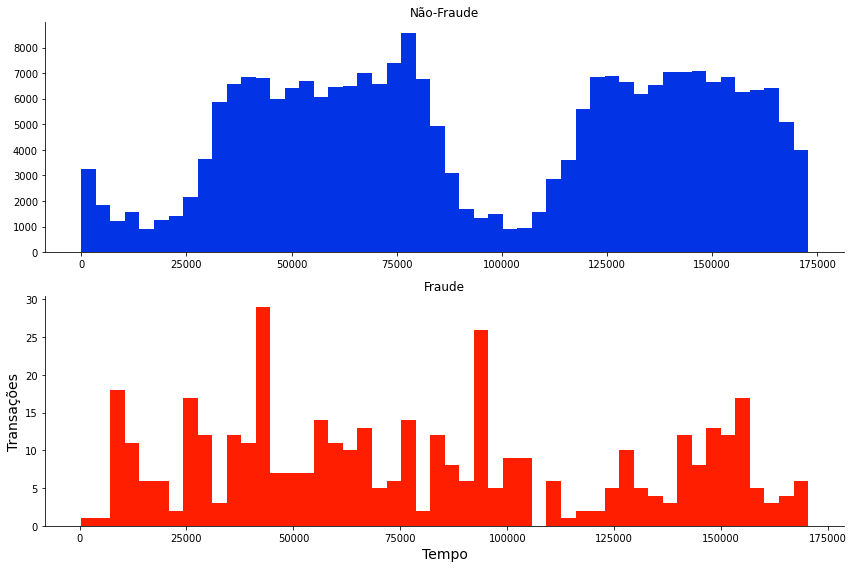

time: 1.2 s (started: 2022-04-25 19:14:09 +00:00)


In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(12,8))

ax[0].hist(x = df.Time[df.Class == 0], color ='#0234E6',bins = 50)
ax[0].set_title("Não-Fraude")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].hist(x = df.Time[df.Class == 1], color ='#FF1E00', bins = 50)
ax[1].set_title("Fraude")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.xlabel('Tempo',fontsize = 14)
plt.ylabel('Transações',fontsize = 14)

plt.tight_layout()

O comportamento das transações fraudulentas é o principal ponto de análise nessa exploração de dados, uma vez que estas são as ocorrências não desejadas. Para se entender como essas transações ocorrem frente as não-fraudes pode-se plotar um gráfico do tipo violino como o abaixo. 

Este gráfico se comporta de maneira parecida com ao boxplot, mostrando dados de quartis, porém se difere ao se plotar uma informação extra: a densidade dos dados

In [ ]:
#Gerando gráfico violino
fig = px.violin(df, y="Amount", x="Class", color="Class",
                box=True,
                labels = {'Amount':'Quantia'},
                color_discrete_sequence=['#0234E6','#FF1E00'],
                range_y = (0,700),
                points = 'suspectedoutliers')


#Mudando a cor do fundo
fig.update_layout(plot_bgcolor="#fcfcfc")
#Formatando o eixo X
fig.update_xaxes(linecolor = "#444")
#Formatando o eixo Y
fig.update_yaxes(linecolor = "#444")

#Função para alterar a legenda
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name
custom_legend_name(['Não-Fraude','Fraude'])

fig.show()

time: 4.02 s (started: 2022-04-25 19:14:22 +00:00)


A análise visual das duas distribuições demonstra que existe uma disparidade entre não-fraudes e fraudes. Enquanto a primeira possui uma densidade mais distribuída ao longo das quantias, as fraudes se concentram em valores até 100.

Isso é percebível ao se analisar as estatísticas descritivas de ambas as ocorrências, enquanto a mediana das fraudes é 9,25 e das não-fraudes é 22.

Em uma última instancia, uma análise da correlação das features é importante para se perceber como as variáveis se relacionam.

A matriz de correlação a seguir não traz nenhuma relação significante nas features, isso pode ser explicado pelo desbalenceamento existente dentro do DataSet


In [ ]:
corr = df.corr()

time: 2.11 s (started: 2022-04-25 19:14:26 +00:00)


In [ ]:
fig = px.imshow(corr,color_continuous_scale='Tealrose', aspect="auto")
fig.update_xaxes(side="top")
fig.show()

time: 144 ms (started: 2022-04-25 19:14:28 +00:00)


Por fim, essa análise exploratória inicial trouxe algumas informações importantes para o entendimento dos dados e do problema:

* Os valores de transação costumam ser baixos, com sua média sendo 88.
* O DataSet não possui valores ausentes/nulos.
* Existe um desbalanceamento evidente no DataSet, já que a maioria das transações (99,83%) é de não-fraudes.
* Uma vez que as features passaram por PCA, conforme descrito na fonte original dos dados, assume-se que todas as variáveis `V` passaram por uma padronização 


## Preparação dos Dados

Nesta etapa, devido a natureza do DataSet, é necessário se aplicar três passos para que os dados estejam devidamente preparados para o modelo de machine learning, sendo eles:

* Normalização dos dados que ainda não foram pré-processados (`Time` e `Amount`)
* Divisão do DataSet entre treino e validação
* Balanceamento entre a classe minoritária (Fraude) e a classe majoritária (Não-Fraude)

### Padronização do DataSet

Nesta etapa é necessário que os dados que não foram padronizados (`Time` e `Amount`) passem por um processo de padronização de forma a transformar todas as features para uma escala comum sem distorcer as diferenças no intervalo dos valores.

Existem diversas formas de padronizar dados, porém, como `Amout` apresenta uma quantidade considerável de outliers, optou-se por utilizar o `RobustScaler`

In [ ]:
#Como as colunas Time e Amount serão retiradas é necessário preservar o DataSet original
df_clean = df.copy()

#Padronizar Amount e Time
rob_scaler = RobustScaler()
df_clean['std_Amount'] = rob_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_Time'] = rob_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

#Retirar o que não está padronizado
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#Ver o novo DataSet
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount,std_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774533,-0.995524
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268502,-0.995524
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959294,-0.995513
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411339,-0.995513
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667292,-0.995501


time: 238 ms (started: 2022-04-25 19:14:30 +00:00)


### Divisão entre Treino e Validação

Para conferir a eficácia do balanceamento e da padronização dos dados a divisão do DataSet mais uma vez é necessária. Se anteriormente o conjunto foi dividido em treino e teste, agora temos uma nova divisão do conjunto de treino (75% do DataSet original) em treino e validação. 

In [ ]:
#separar variáveis X e Y
X = df_clean.drop('Class',axis=1)
y = df_clean['Class']

#Divir entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

time: 173 ms (started: 2022-04-25 19:14:34 +00:00)


### Balanceamento das classes

Conforme visto na análise exploratória, o DataSet apresenta um claro desbalanceamento, característico do tipo de negócio analisado. Este tipo de desbalanceamento afeta o modelo de machine learning pois enviesa sua análise, uma vez que o peso da classe majoritária passa a ditar como o modelo lida com dados novos e a tendência de resultados do tipo falso negativos aumenta.

Para o balanceamento de conjuntos de dados existem diversas técnicas diferentes, como o Oversampling, que consiste em se criar cópias da classe minoritária até atingir o tamanho da majoritária, o Unsersampling, que realiza o oposto, retirando dados da classe majoritária até atingir o tamanho da minoritária, entre outros.

Para o balanceamento deste conjunto de dados a combinação das técnicas Synthetic Minority Over-sampling Technique (SMOTE) e Tomek foi escolhida. Ela consiste em fazer oversampling da classe minoritária enquanto se faz um undersampling da classe majoritária.


0    241668
1    241668
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



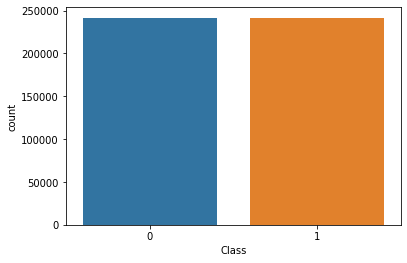

time: 1h 50min 49s (started: 2022-04-20 11:10:49 +00:00)


In [ ]:
#Usar técnica de SMOTETomek
smk = SMOTETomek(random_state = 42, n_jobs = -1)
X_smk,y_smk = smk.fit_resample(X, y)

# ver o balanceamento das classes
print(pd.Series(y_smk).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_smk);

In [ ]:
df_smk = pd.read_csv("https://www.dropbox.com/s/w2mat1eaq74pbh6/smote.csv?dl=1", index_col = "Unnamed: 0" )

time: 9.81 s (started: 2022-04-25 19:15:26 +00:00)


O balanceamento das classes faz com que novas entradas para Fraudes seja adicionada ao DataSet, de modo a se igualar a classe de Não-Fraude.

Como o processo de balanceamento consome um tempo significativo (cerca de 1h50), esta base balanceada foi salva diretamente,no formato `csv`, em um link externo

Plotando-se novamente a matriz de correlação agora podemos perceber relações significativas entre as features.

In [ ]:
X_smk = df_smk.drop('Class',axis=1)
y_smk = df_smk['Class']

time: 49.9 ms (started: 2022-04-25 19:16:24 +00:00)


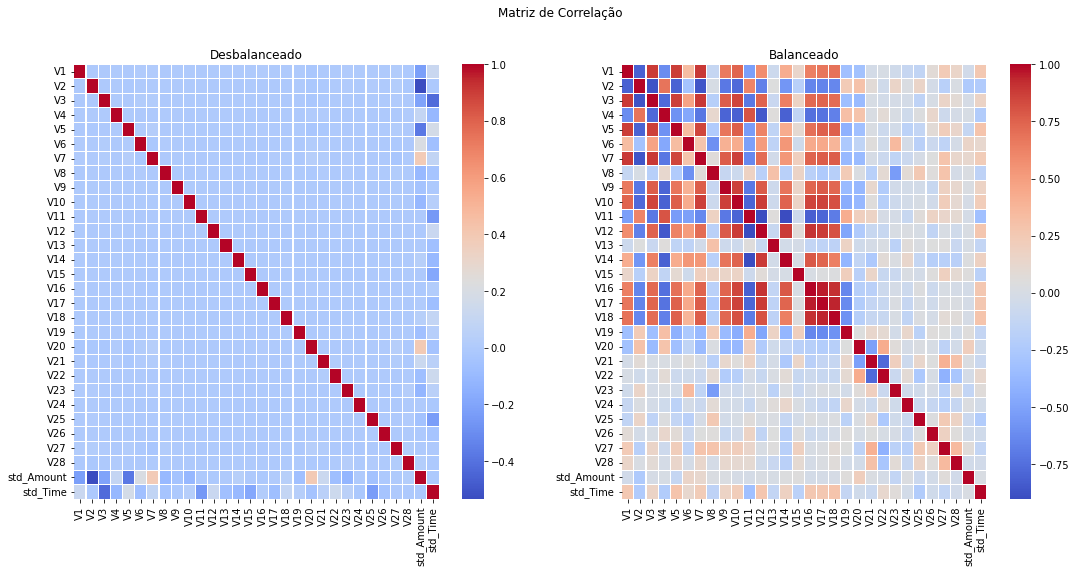

time: 2.79 s (started: 2022-04-25 19:16:25 +00:00)


In [ ]:
corr = X_train.corr()
corr_smk = pd.DataFrame(X_smk).corr()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_smk, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()


Por fim, ao final desta sessão, obtemos os seguintes resultados:


* Os dados que não haviam sido padronizados anteriormente (`Amount` e `Time`)foram padronizados utilizando-se `RobustScaler`
* O DataSet de treino foi novamente dividido, desta vez entre treino e validação, respeitando a proporção existente
* As classes foram balanceadas utilizando-se uma combinação das técnicas SMOTE e Tomek, de forma a se utilizar oversampling na classe minoritária enquanto se realiza um undersampling na classe majoritária

## Modelo de Machine Learning

Existem diversos modelos de machine learning de acordo com o intuito e tipo de aprendizado que se irá utilizar. Para o caso deste conjunto de dados temos uma **aprendizado supervisionado**, uma vez que os dados já possuem estruturação e classificação, e queremos atingir um resultado que **classifique** a operação realizada em Fraude ou Não-Fraude, sendo assim escolheu-se a aplicação de **2** modelos distintos de machine learning, sendo eles:

* Regressão Logística
* SVM



In [ ]:
# instanciar e treinar um modelo de Regressão Logística
log = LogisticRegression(max_iter=300,random_state=42)
log.fit(X_smk, y_smk)

# fazer as previsões em cima dos dados de validação
y_logpred = log.predict(X_val)
y_logproba = log.predict_proba(X_val)


time: 12.2 s (started: 2022-04-25 19:16:33 +00:00)


In [ ]:
X_svm = X_smk
y_svm = y_smk

# instanciar e treinar um modelo de SVM
sv = svm.SVC(random_state=42, probability=True)
sv.fit(X_svm,y_svm)

# fazer as previsões em cima dos dados de validação
y_svmpred = sv.predict(X_val)
y_svmproba = sv.predict_proba(X_val)

time: 1h 19min 58s (started: 2022-04-25 19:18:59 +00:00)


Com os modelos instanciados e treinados podemos obter métricas de desempenho por meio da biblioteca **scikitplot**. A seguir temos como parâmetros de desempenho as seguintes informações:

* Relatório de Classificação, composto de precisão, recall, f1-score e divisão entre as classes (Support)
* Acurácia 
* Curva AUC, que mede a área sob a curva ROC, uma medida entre as taxas de verdadeiros positivos e falsos positivos 

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9761    0.9879     60417
           1     0.0642    0.9429    0.1202       105

    accuracy                         0.9761     60522
   macro avg     0.5321    0.9595    0.5540     60522
weighted avg     0.9983    0.9761    0.9864     60522

Acurácia: 0.9761

AUC: 0.9595



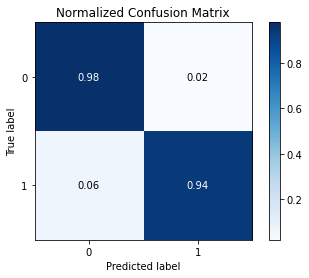

time: 291 ms (started: 2022-04-25 20:39:19 +00:00)


In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_logpred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_logpred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_logpred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_logpred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9855    0.9927     60417
           1     0.1054    0.9810    0.1904       105

    accuracy                         0.9855     60522
   macro avg     0.5527    0.9832    0.5915     60522
weighted avg     0.9984    0.9855    0.9913     60522

Acurácia: 0.9855

AUC: 0.9832



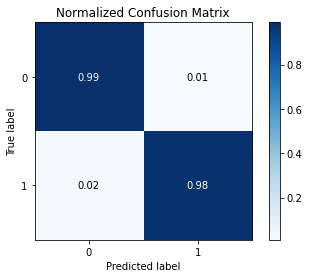

time: 310 ms (started: 2022-04-25 20:57:50 +00:00)


In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_svmpred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_svmpred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_svmpred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_svmpred)))

Uma vez que os dados inicialmente apresentam desbalanceamento não é interessante se olhar a acurácia para se medir o desempenho do modelo, pois, caso o modelo prevesse todas as transações como não-fraude, acertaria em mais de 99% das vezes porém não trataria da classe mais importante para o negócio: a identificação de fraudes.

Com isto, a métrica que olharemos para medir o desempenho do modelo será a AUC, uma vez que ela retorna verdadeiramente a capacidade do modelo de categorizar corretamente os dados. Neste caso quanto mais próximo de **1** o modelo é, melhor seu desempenho.

Abaixo temos um gráfico comparando ambas as curvas ROC e sua AUC


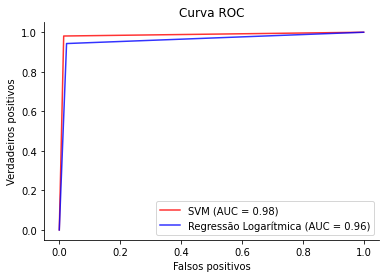

time: 403 ms (started: 2022-04-25 22:59:16 +00:00)


In [ ]:
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Curva ROC")
svcval_disp = RocCurveDisplay.from_predictions(y_val, y_svmpred,ax=ax, alpha=0.8,name='SVM', color = "Red")
logval_disp = RocCurveDisplay.from_predictions(y_val, y_logpred,ax=ax, alpha=0.8,name='Regressão Logarítmica', color = "Blue")
ax.set_xlabel("Falsos positivos")
ax.set_ylabel("Verdadeiros positivos");

Levando-se essa métrica em consideração temos que o **SVM** possui um AUC superior (0,9832) em relação a **Regressão Logística**, isso nos leva a crer que este modelo seria o melhor para a análise de fraudes, porém outro fator deve ser levado em conta: enquanto a Regressão Logística leva alguns segundos para realizar seu treino, o SVM leva mais de 1h para executar a mesma coisa.

Sendo assim, é necesário que o *tradeoff* entre capacidade computacional e necessidade de acerto na classe a ser analisada para o negócio seja levada em consideração.

No caso do negócio analisado a necessidade de se acertar os verdadeiros negativos é vital, uma vez que a fraude ocasiona danos a empresa, tanto financeiramente como de reputação.




Com os dados treinados e validados e com a premissa de que o **SVM** se mostra o melhor modelo, podemos testar o modelo diretamente nos dados de teste, separados do conjunto de dados no ínicio do projeto.



## Avaliar o desempenho do modelo

Após a validação dos modelos no conjunto de dados de validação é necessário que se utilize dados próximos aos reais para que de fato a eficiência do modelo seja testada. Para isto utiliza-se o conjunto de teste, separado do DataSet principal no inicio do projeto.

Como os dados de teste não passaram pelo processo de padronização é necessário que se aplique a mesma técnica neles, utilizando-se o Robust Scaler, porém não é necessário que se balanceie esse conjunto, uma vez que a intenção do conjunto de testes é se aproximar ao máximo de situações reais.


In [ ]:
# padronizar as colunas Time e Amount - Teste
df_teste_clean = df_teste.copy()

df_teste_clean['std_Amount'] = rob_scaler.fit_transform(df_teste_clean['Amount'].values.reshape(-1, 1))
df_teste_clean['std_Time'] = rob_scaler.fit_transform(df_teste_clean['Time'].values.reshape(-1, 1))

df_teste_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_teste_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount,std_Time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,0.256891,0.485609
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.283319,0.854959
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,1.052572,0.798947
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,4.064791,-0.394958
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.240409,-0.759770


time: 66 ms (started: 2022-04-25 21:20:03 +00:00)


In [ ]:
# separar variáveis entre X e y
X_test = df_teste_clean.drop('Class', axis=1)
y_test = df_teste_clean['Class']

time: 4.53 ms (started: 2022-04-25 21:20:05 +00:00)


Agora, com os dados devidamente padronizados e separados em *features* e varíavel alvo pode se testar o modelo diretamente no conjunto de testes.

In [ ]:
# fazer as previsões em cima dos dados de teste
y_predlog = log.predict(X_test)
y_probalog = log.predict_proba(X_test)

y_predsvm = sv.predict(X_test)
#y_probasv = sv.predict_proba(X_test)


time: 2min 51s (started: 2022-04-25 21:21:23 +00:00)


Da mesma maneira que se fez na validação pode-se plotar uma matriz de confusao, métricas de desempenho dos modelos testados e uma comparação entre as curvas ROC e suas AUCs.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     42647
           1     0.0629    0.9459    0.1180        74

    accuracy                         0.9755     42721
   macro avg     0.5314    0.9608    0.5528     42721
weighted avg     0.9983    0.9755    0.9861     42721

Acurácia: 0.9755

AUC: 0.9608



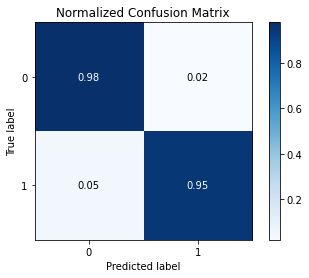

time: 273 ms (started: 2022-04-25 21:27:43 +00:00)


In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_predlog, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_predlog, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_predlog)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_predlog)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9856    0.9927     42647
           1     0.1000    0.9189    0.1804        74

    accuracy                         0.9855     42721
   macro avg     0.5499    0.9523    0.5865     42721
weighted avg     0.9983    0.9855    0.9913     42721

Acurácia: 0.9855

AUC: 0.9523



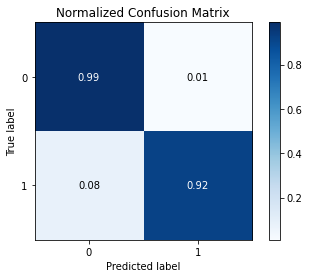

time: 269 ms (started: 2022-04-25 21:27:49 +00:00)


In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_predsvm, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_predsvm, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_predsvm)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_predsvm)))

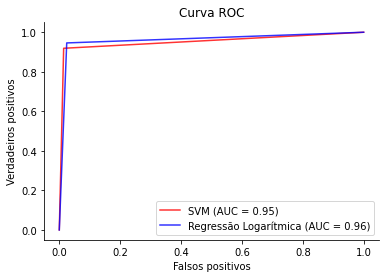

time: 515 ms (started: 2022-04-25 22:56:35 +00:00)


In [ ]:
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Curva ROC")
svcval_disp = RocCurveDisplay.from_predictions(y_test, y_predsvm,ax=ax, alpha=0.8,name='SVM', color = "Red")
logval_disp = RocCurveDisplay.from_predictions(y_test, y_predlog,ax=ax, alpha=0.8,name='Regressão Logarítmica', color = "Blue")
ax.set_xlabel("Falsos positivos")
ax.set_ylabel("Verdadeiros positivos");

Ao contrário do apresentado no conjunto de validação, a **Regressão Logística** agora apresenta um melhor desempenho, inclusive tendo uma pequena melhora.

As métricas do **SVM** demonstra que a acurácia não é a melhor métrica de desempenho para se analisar conjuntos desbalanceados, uma vez que se mantém a mesma na validação e no teste, porém sua AUC indica que o desempenho do modelo caiu ao se utilizar os dados de teste, dados estes que são os mais próximos da realidade que o modelo irá enfrentar.



## Conclusão

Modelos de Machine Learning tem se tornado populares e sua aplicação seguem passos bem específicos e simples:

* Divisão do conjunto entre teste e treino
* Padronização dos dados
* Opcionalmente pode-se dividir novamente o conjunto de dados entre treino e validação e executar um balanceamento das classses
* Divisão entre *features* (X) e variável-alvo (y)
* Aplicação do modelo escolhido
* Avaliação das métricas de desempenho

Porém este projeto demonstra que existe uma necessidade de se agregar muitos outros conhecimentos ao longo deste processo, desde o entendimento de qual técnica de padronização se utilizar, de acordo com a presença de *outliers* e outros indicativos nas variáveis a serem padronizadas, até o entendimento do negócio, que foi vital para se entender o desbalanceamento existente na variável-alvo e quais métricas trazem informações relevantes acerca do desempenho do modelo.

Outro ponto interessante que este projeto demonstrou é a necessidade de se entender o *tradeoff* existente entre a capacidade computacional e o algoritmo a ser escolhido, pois, caso o modelo *SVM* fosse o de melhor desempenho, a melhora proveniente deste algoritmo frente a *Regressão Logística* teria que ser analisada, uma vez que o *SVM* demanda de um tempo muito maior de processamento para treinar e testar o modelo frente aos dados.